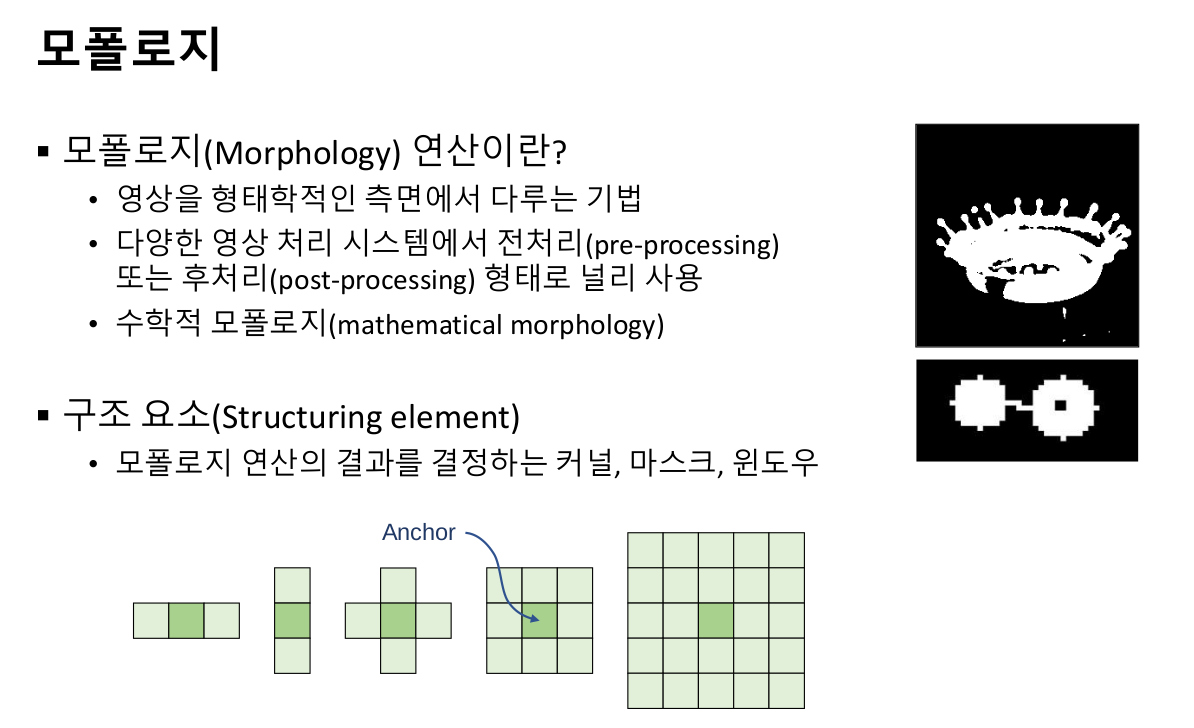

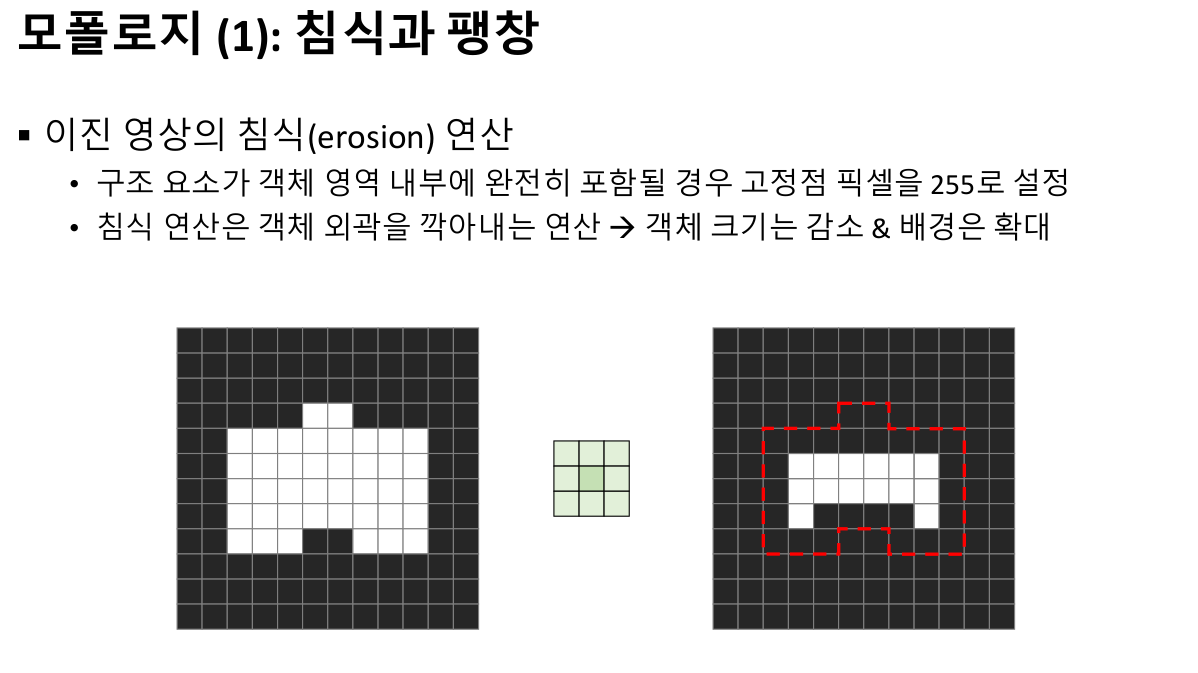

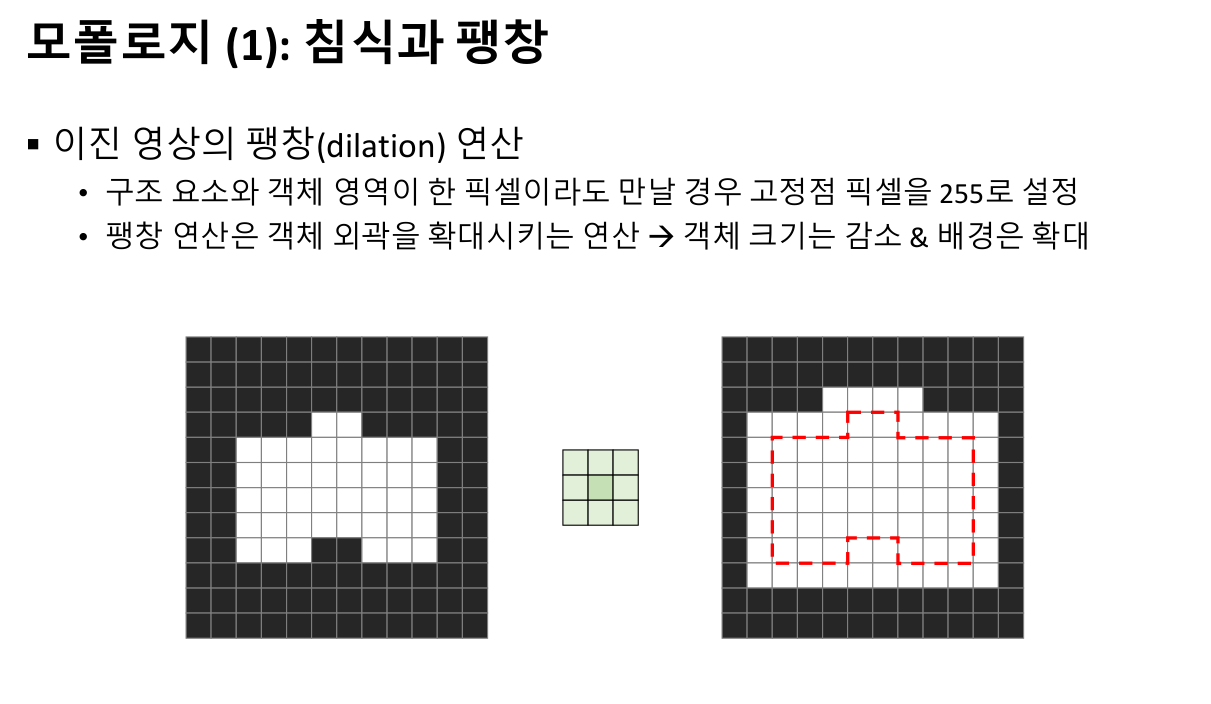

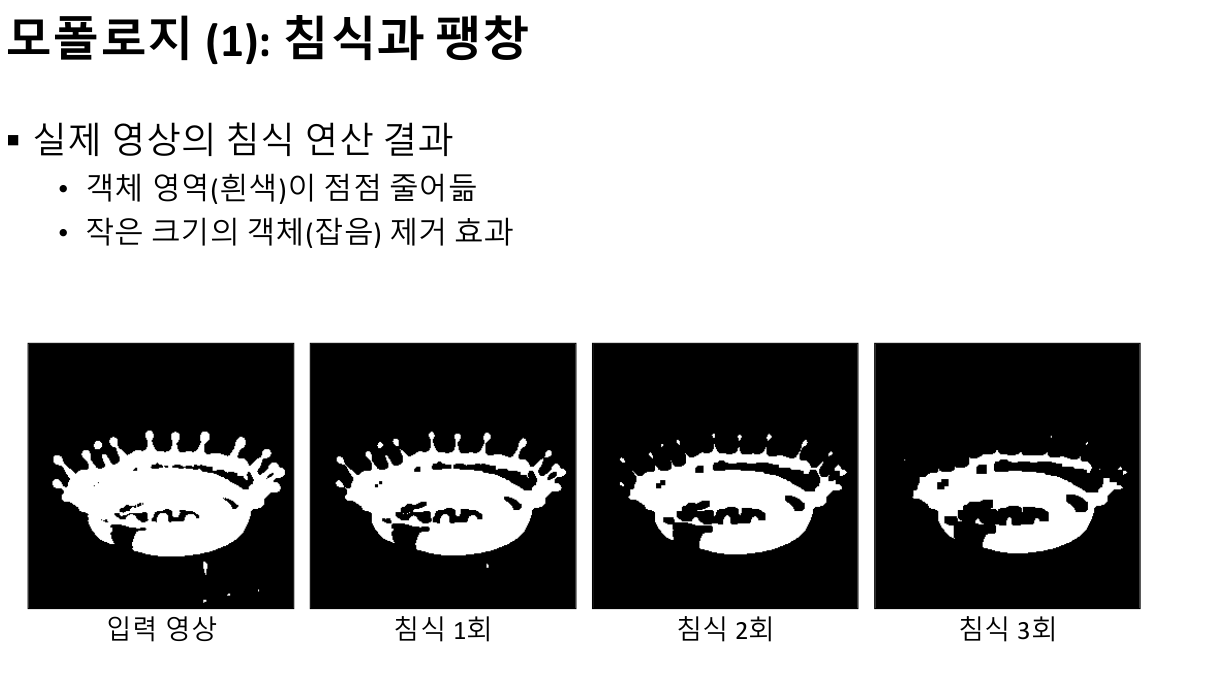

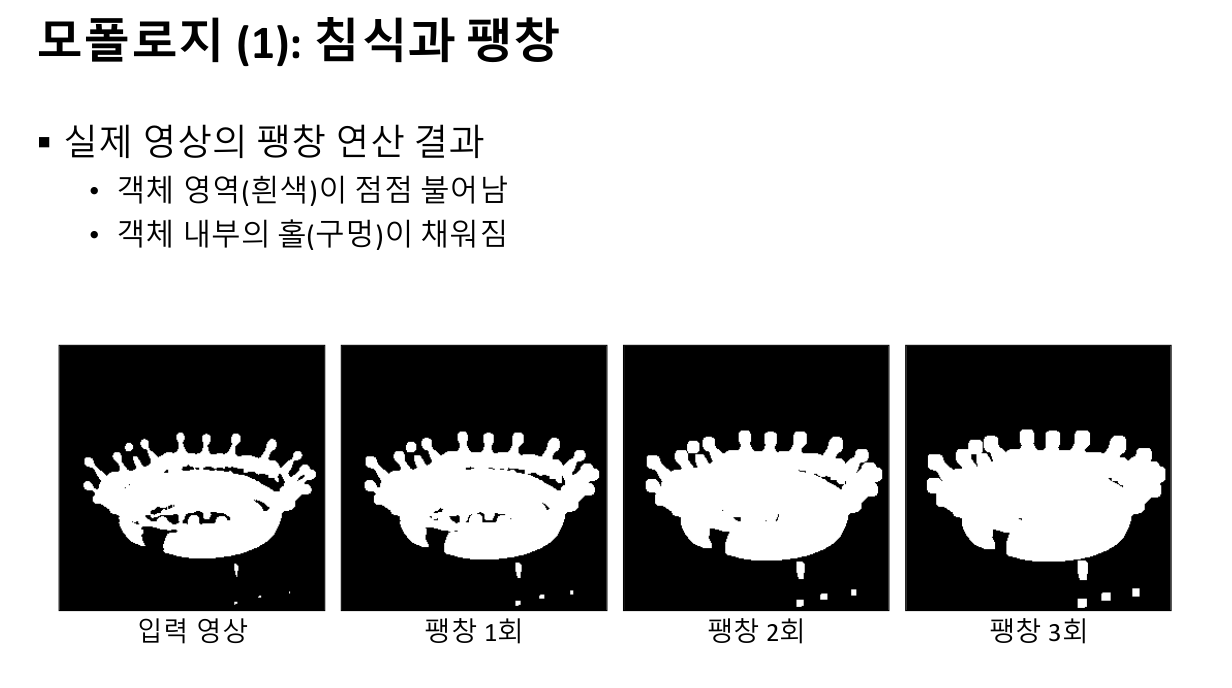

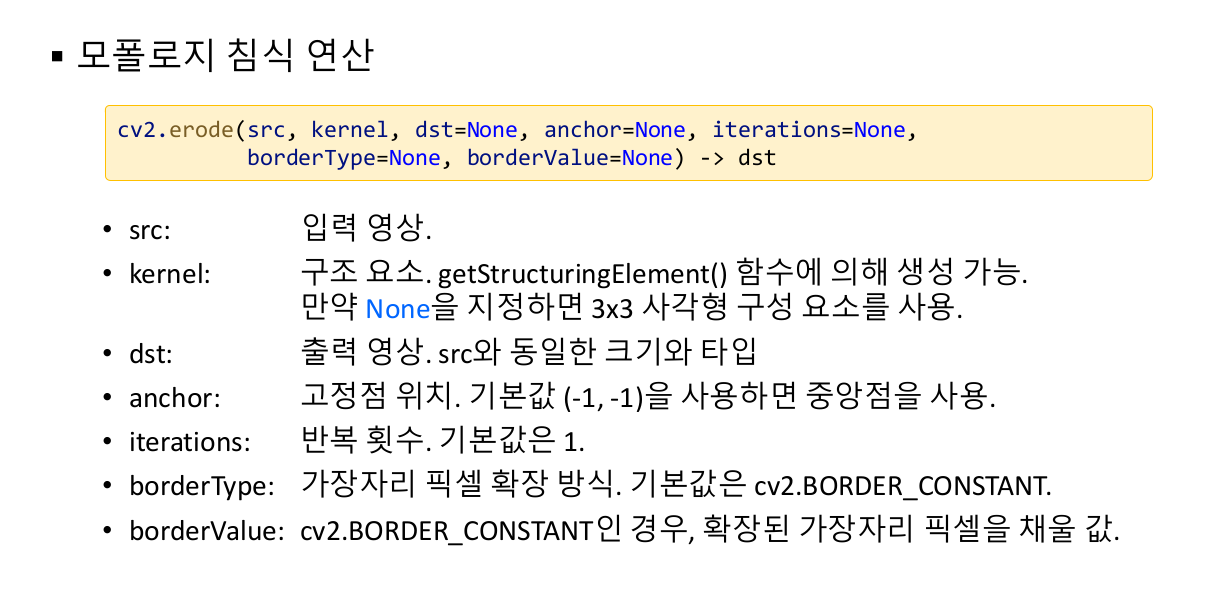

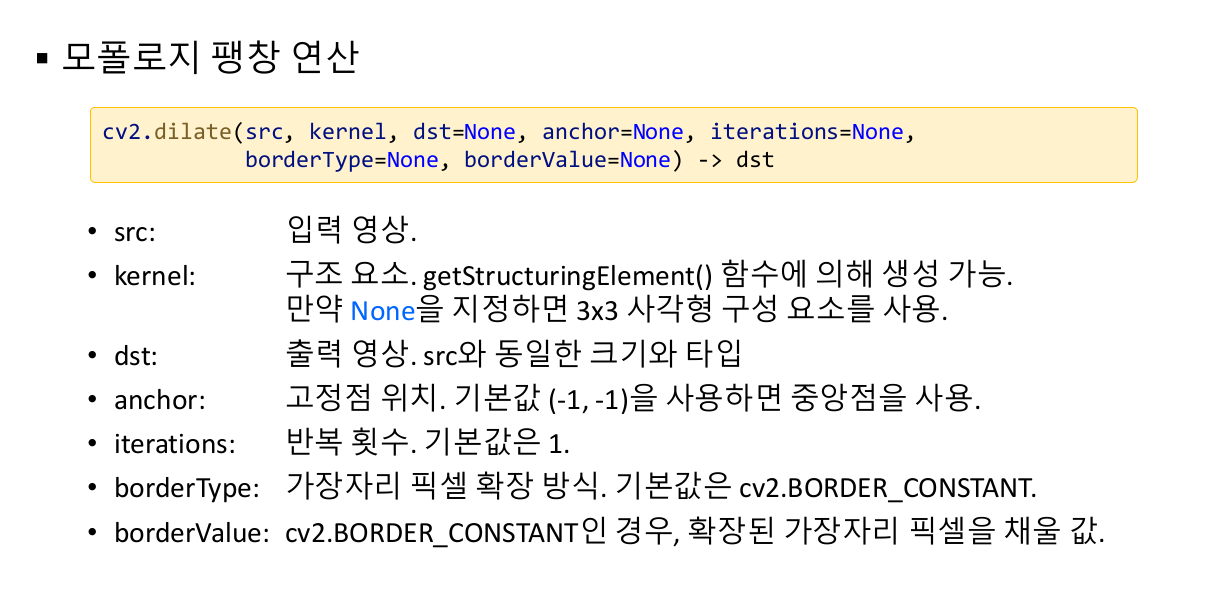

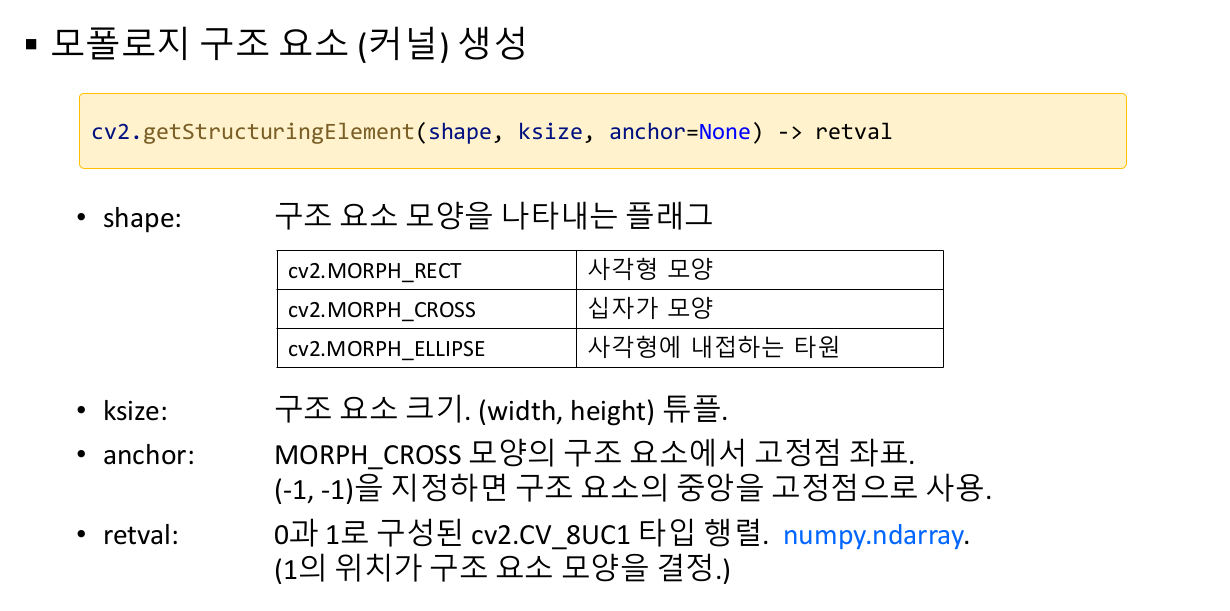

In [1]:
import sys
import numpy as np
import cv2

In [2]:
src = cv2.imread('../data/circuit.bmp',cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed')
    sys.exit()

In [3]:
se = cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))
dst1 = cv2.erode(src,se)
dst2 = cv2.dilate(src,None)

In [4]:
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

KeyboardInterrupt: 

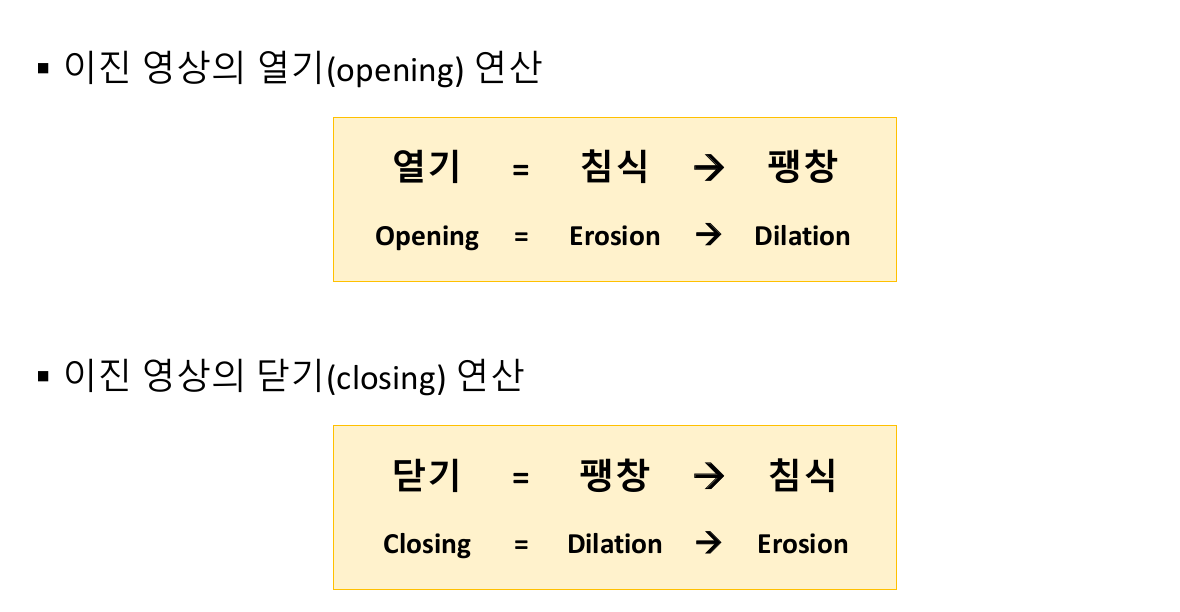

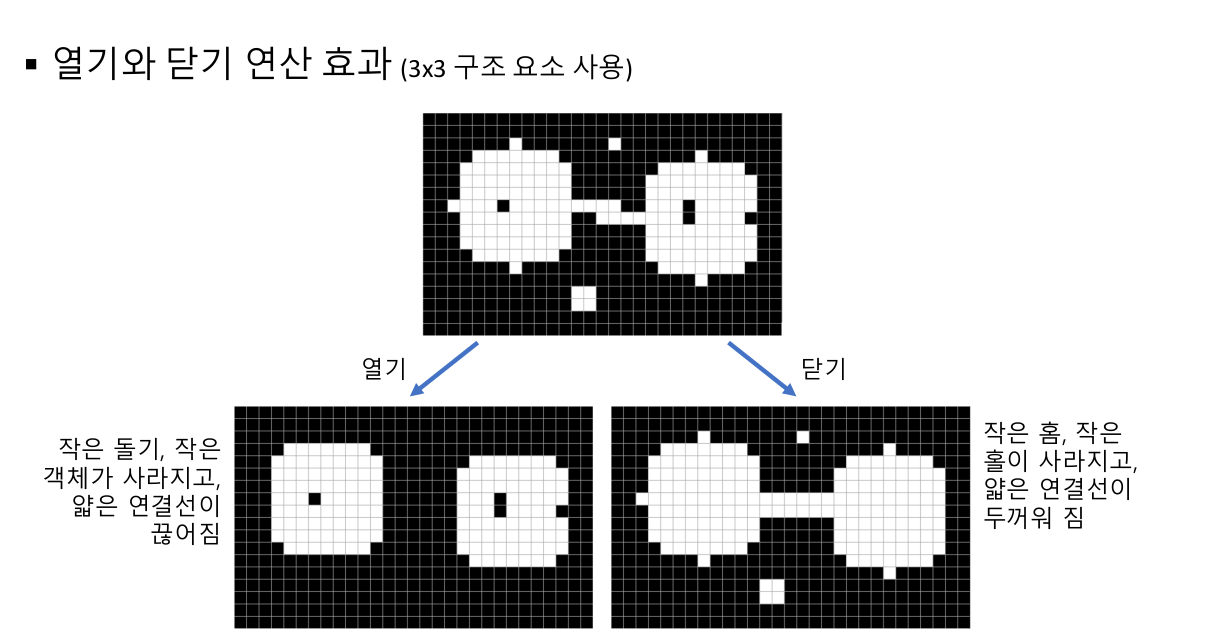

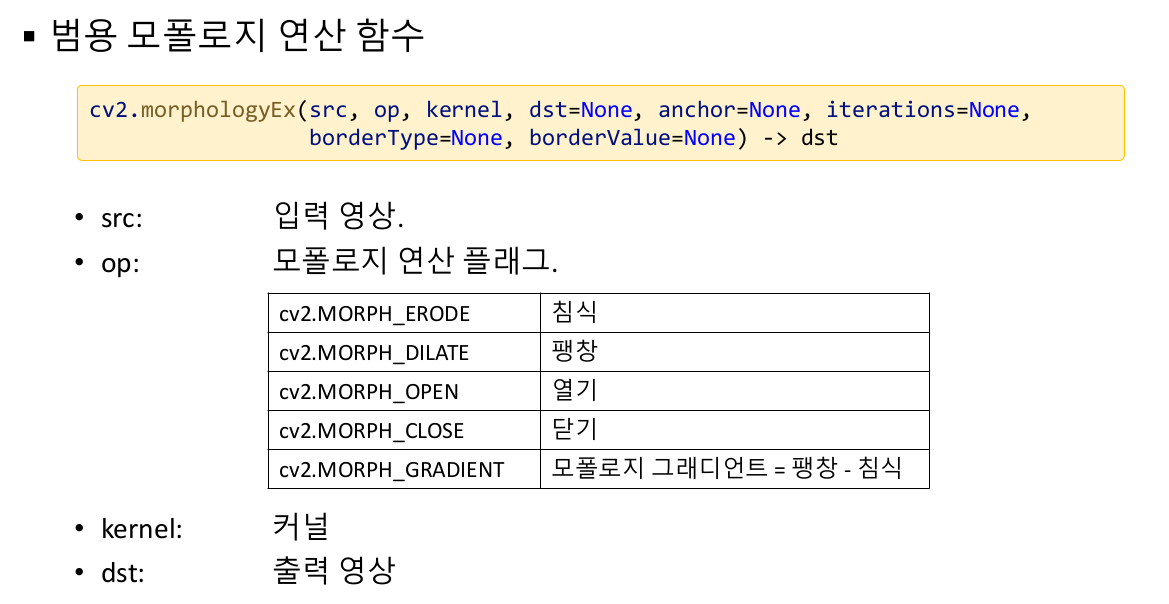

## 열기 연산을 이용한 잡음 제거 예제

In [11]:
import sys
import numpy as np
import cv2

In [12]:
src = cv2.imread('../data/rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [13]:
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

cnt1, _ = cv2.connectedComponents(dst1)
print('cnt1:', cnt1)

dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)
#dst2 = cv2.erode(dst1, None)
#dst2 = cv2.dilate(dst2, None)

cnt2, _ = cv2.connectedComponents(dst2)
print('cnt2:', cnt2)

cnt1: 113
cnt2: 99


In [14]:
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()